# Specialist Certificate in Data Analytics Essentials Project

## Chapter 1: Introduction

I have chosen to undertake a project examining strokes gained data for professional golfers on the PGA Tour.

## Chapter 2: Importing Data

### Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests
url = "https://www.pgatour.com/fedexcup/official-standings.html"
result = requests.get(url)

In [2]:
soup= BeautifulSoup(result.text, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport">
   <link href="https://www.pgatour.com/fedexcup/official-standings.html" rel="canonical"/>
   <meta content="FedExCup - Official Standings | PGA TOUR" name="title"/>
   <meta content="The current cumulative points for the year that the player has earned in the FedExCup points race." name="description"/>
   <meta content="pga-tour/9wzdncrfhz2c" name="msApplication-ID"/>
   <meta content="xp_dFTcmlaq2Fgq3gyZfIjWo0KjdEC4cfaO4nWx5yPA" name="google-site-verification"/>
   <!-- Google Authorship and Publisher Markup -->
   <!-- Schema.org markup for Google+ http://schema.org/Article -->
   <meta content="FedExCup - Official Standings | PGA TOUR" itemprop="name"/>
   <meta content="The current cumulative points for the year that the player has earned in the FedExCup points race." itemprop="des

In [3]:
table_element = soup.find("table", class_="table-styled table-fedexcup-standings")
print(table_element)

<table cellpadding="0" cellspacing="0" class="table-styled table-fedexcup-standings">
<tr>
<th>RANK THIS<br/>WEEK</th>
<th class="hidden-small">RANK LAST<br/>WEEK</th>
<th>PLAYER<br/>NAME</th>
<th class="hidden-medium hidden-small">Events</th>
<th class="hidden-small">Points</th>
<th class="hidden-medium hidden-small"># of Wins</th>
<th class="hidden-medium hidden-small"># of Top-10s</th>
<th>Points behind Lead</th>
<th class="hidden-medium hidden-small">Reset Points</th>
</tr>
<tr class="odd">
<td><b>1</b></td>
<td class="hidden-small">1</td>
<td><a href="/players/player.46046.scottie-scheffler.html">Scottie Scheffler</a></td>
<td class="hidden-medium hidden-small">16</td>
<td class="hidden-small">
                    2,842</td>
<td class="hidden-medium hidden-small">
                    4</td>
<td class="hidden-medium hidden-small">
                    7</td>
<td>
                    0</td>
<td class="hidden-medium hidden-small">
                    --</td>
</tr>
<tr>
<td><b>2</b></t

In [4]:
table_rows = []


for row in table_element.find_all("tr"):
    details= row.find_all("td")
    table_rows.append(details)

table_rows = list(filter(None, table_rows))
table_rows = [item for item in table_rows if len(item)==9]

In [5]:
fedex_ranking = []
player_name = []
events_played = []
fedex_points = []
num_wins = []
num_top_10s = []


for row in table_rows:
    fedex_ranking.append(row[0])
    player_name.append(row[2])
    events_played.append(row[3])
    fedex_points.append(row[4])
    num_wins.append(row[5])
    num_top_10s.append(row[6])
                

In [6]:
import re

player_name = [re.sub(r'<.*?>','', str(name)) for name in player_name]
player_name = [player.replace('\xa0',' ') for player in player_name]

In [7]:
def remove_tags(lists):
    """remove HTML tags and convert to integer"""
    lists = [re.sub(r'<.*?>','', str(element)) for element in lists]
    lists = [element.replace(',','') for element in lists]
    lists = [element.replace('--','0') for element in lists]
    lists = [int(element) for element in lists]
    return lists


fedex_ranking = remove_tags(fedex_ranking)
events_played = remove_tags(events_played)
fedex_points = remove_tags(fedex_points)
num_wins = remove_tags(num_wins)
num_top_10s = remove_tags(num_top_10s)

In [8]:
import pandas as pd 
pd.DataFrame({'Player Name': player_name,'Fedex Ranking': fedex_ranking,'Events Played':events_played,
             'Fedex Points': fedex_points, 'Number of Wins': num_wins, 
              'Number of Top 10s' : num_top_10s}).to_csv('fedex_cup_rankings.csv')

### Importing Data from a CSV File into a Pandas DataFrame

In [9]:
fedex_cup = pd.read_csv (r'Documents\UCD Project\fedex_cup_rankings_230522.csv')
print(fedex_cup.head())
strokes_gained = pd.read_csv (r'Documents\UCD Project\strokes_gained_data_230522.csv')
print(strokes_gained.head())

   Unnamed: 0        Player Name  Fedex Ranking  Events Played  Fedex Points  \
0           0  Scottie Scheffler              1             16          2842   
1           1      Cameron Smith              2             11          1603   
2           2          Sam Burns              3             15          1601   
3           3      Justin Thomas              4             13          1568   
4           4   Hideki Matsuyama              5             14          1544   

   Number of Wins  Number of Top 10s  
0               4                  7  
1               2                  5  
2               2                  6  
3               1                  8  
4               2                  5  
          player_name  events_played  wins  x_wins  x_wins_majors  \
0      Thomas, Justin             14     1   0.345          0.090   
1      Smith, Cameron             12     2   1.757          0.069   
2       McIlroy, Rory             11     1   0.247          0.269   
3  Scheff

## Chapter 3: Analysing Data

In [10]:
strokes_gained['first_name'] = strokes_gained['player_name'].str.rsplit(',').str[-1].str.strip()
strokes_gained['surname'] = strokes_gained['player_name'].str.extract('(.+?),')
strokes_gained['player_name'] = strokes_gained['first_name'] + " " + strokes_gained['surname']
strokes_gained.drop(["first_name", "surname"], axis = 1, inplace = True)

In [11]:
strokes_gained

,player_name,events_played,wins,x_wins,x_wins_majors,rounds_played,shotlink_played,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
0,Justin Thomas,14,1,0.345,0.090,55,43,0.322515,0.395559,0.915848,0.373701,1.685109,1.871881
1,Cameron Smith,12,2,1.757,0.069,42,35,0.715735,0.268823,1.217806,-0.120312,1.366317,2.012048
2,Rory McIlroy,11,1,0.247,0.269,42,38,0.329505,0.618240,0.408667,0.932341,1.959247,1.973157
3,Scottie Scheffler,17,4,0.866,0.793,65,44,0.458728,0.396876,0.695335,0.179576,1.271787,1.057540
4,Jon Rahm,12,1,1.023,0.000,46,39,0.043139,-0.193457,0.493248,1.280379,1.580171,1.349366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Cormac Sharvin,10,0,0.000,0.000,21,13,-0.034146,-0.105258,-1.027368,-1.360492,-2.493119,-2.153761
444,Ted Potter Jr,8,0,0.000,0.000,19,3,-1.041467,-2.123030,-0.645564,-0.933956,-3.702550,-2.611746
445,Richard S. Johnson,5,0,0.000,0.000,13,3,-1.138339,-0.939325,-1.025755,-1.475916,-3.440996,-3.125817
446,Kevin Stadler,7,0,0.000,0.000,17,5,-1.973688,-1.006540,-1.632037,-0.812414,-3.450991,-3.813691


In [12]:
df = fedex_cup.merge(strokes_gained, left_on='Player Name', right_on='player_name', how = 'inner')
df.drop(['Unnamed: 0','player_name','events_played','wins','x_wins_majors','rounds_played','shotlink_played'], 
             axis=1, inplace=True)

In [13]:
df

,Player Name,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
0,Scottie Scheffler,1,16,2842,4,7,0.866,0.458728,0.396876,0.695335,0.179576,1.271787,1.057540
1,Cameron Smith,2,11,1603,2,5,1.757,0.715735,0.268823,1.217806,-0.120312,1.366317,2.012048
2,Sam Burns,3,15,1601,2,6,0.430,0.442580,0.092828,0.631290,0.210649,0.934767,1.269893
3,Justin Thomas,4,13,1568,1,8,0.345,0.322515,0.395559,0.915848,0.373701,1.685109,1.871881
4,Hideki Matsuyama,5,14,1544,2,5,1.208,-0.184929,0.257662,0.743802,0.278980,1.280443,1.338770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,D.J. Trahan,238,6,11,0,0,0.000,-1.499503,0.302569,0.732476,-0.053070,0.981974,-0.241255
223,Bo Hoag,241,10,6,0,0,0.000,-0.403142,-0.354863,-1.158659,-0.164619,-1.678142,-0.337486
224,Davis Love III,243,5,3,0,0,0.000,-0.388319,-0.304571,-1.071721,0.022630,-1.353662,-1.241088
225,Ben Crane,244,5,3,0,0,0.000,0.265817,-0.104388,-0.891400,0.086690,-0.909097,-1.848540


In [14]:
df.isnull().sum()

Player Name          0
Fedex Ranking        0
Events Played        0
Fedex Points         0
Number of Wins       0
Number of Top 10s    0
x_wins               0
putt_raw             0
arg_raw              0
app_raw              0
ott_raw              0
t2g_raw              0
total_raw            0
dtype: int64

In [15]:
df.describe()

,Fedex Ranking,Events Played,Fedex Points,Number of Wins,Number of Top 10s,x_wins,putt_raw,arg_raw,app_raw,ott_raw,t2g_raw,total_raw
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,118.656388,15.268722,379.264317,0.136564,1.519824,0.105410,0.002110,0.011700,-0.011463,-0.018911,-0.018674,0.121876
std,68.475795,4.459557,382.189513,0.454897,1.600139,0.256136,0.397169,0.292853,0.503523,0.405969,0.812016,0.723542
min,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,-1.973688,-1.006540,-2.193195,-1.605798,-3.450991,-3.813691
25%,60.500000,13.000000,118.000000,0.000000,0.000000,0.000000,-0.252374,-0.190562,-0.238243,-0.249404,-0.572104,-0.284957
50%,118.000000,16.000000,281.000000,0.000000,1.000000,0.008000,0.021594,0.038613,0.004549,-0.026987,-0.016401,0.096942
75%,176.500000,19.000000,481.000000,0.000000,2.000000,0.048500,0.262132,0.207688,0.332509,0.253095,0.507901,0.552440
max,252.000000,24.000000,2842.000000,4.000000,8.000000,1.757000,1.067602,0.908702,1.217806,1.280379,1.959247,2.012048


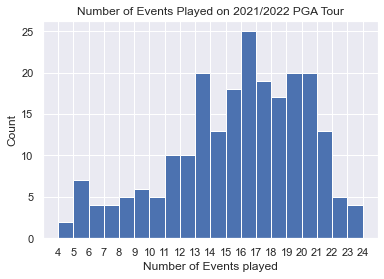

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
event_bins = np.arange(4,25)
sns.set()
_ = plt.hist(df['Events Played'],bins=event_bins)
_ = plt.xlabel('Number of Events played')
_ = plt.ylabel('Count')
_ = plt.xticks(event_bins)
_ = plt.title('Number of Events Played on 2021/2022 PGA Tour')
plt.show()

In [17]:
df = df.loc[df['Events Played'] > 9] 
df.describe()
df_sg = df[['putt_raw','arg_raw','app_raw','ott_raw','t2g_raw','total_raw']]

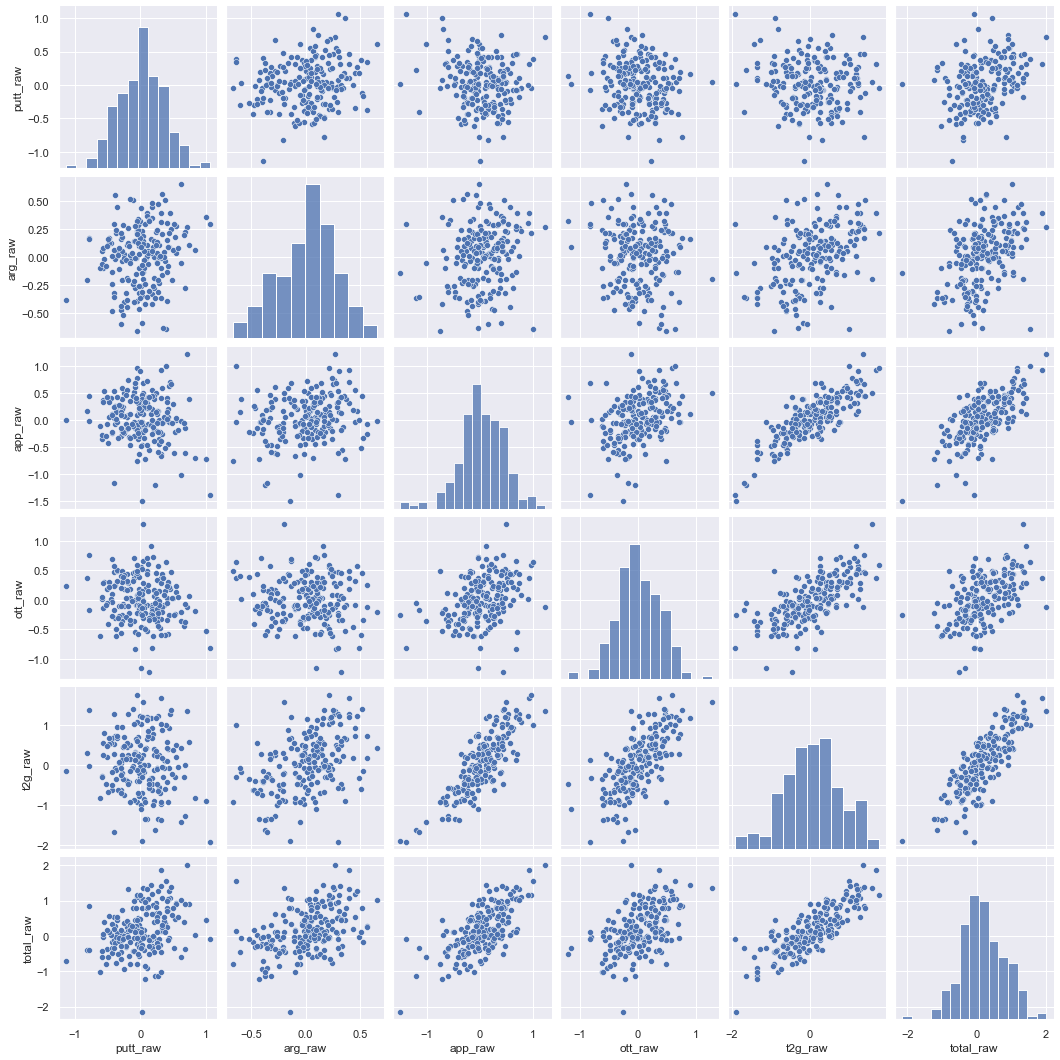

In [18]:
sns.pairplot(df_sg)

## Chapter 4: Machine Learning

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore') #ignore warnings
features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
data_scaler = MinMaxScaler()
features_scaled = data_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=['putt_raw','arg_raw','app_raw','ott_raw'])

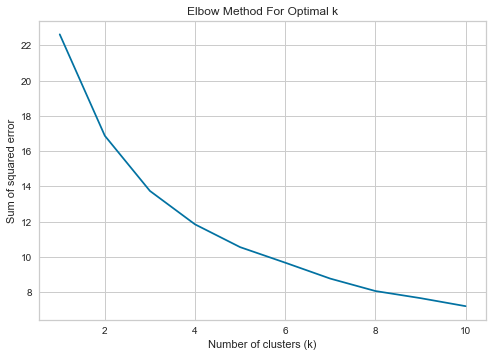

In [33]:
sse = []

for k in np.arange(1,11,1):
    km = KMeans(n_clusters=k)
    km.fit(features_scaled)
    sse.append(km.inertia_)
    
##Get the 'optimal' value for k
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method For Optimal k')
plt.show()

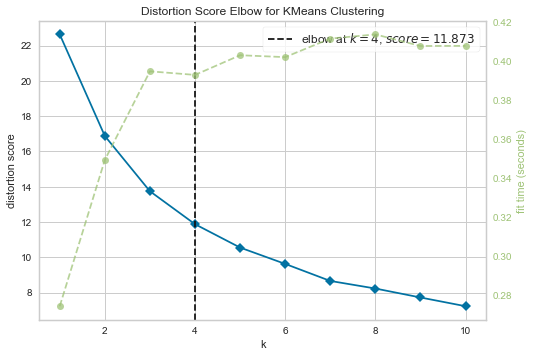

In [34]:
# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_scaled)

#Create the graph
visualizer.show();

In [35]:
kmeansmodel = KMeans(n_clusters= 4)
y_kmeans= kmeansmodel.fit_predict(features_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 1, 3, 1, 0, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 3, 1, 0, 1, 0, 2, 3, 2, 0, 3,
       1, 3, 3, 0, 1, 3, 1, 0, 2, 3, 1, 3, 0, 0, 3, 2, 3, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 1, 3, 1, 2, 2, 3, 1, 0, 0, 1, 2, 1, 1, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 0, 1, 3, 1, 2, 2, 1, 1, 1, 3, 0, 3, 1, 2, 2, 2, 1, 1,
       3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 2, 0, 3, 2, 2, 3, 3, 3,
       1, 2, 1, 3, 1, 3, 1, 1, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 1,
       3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 3, 2, 3, 1, 3, 1, 2, 3, 1, 1, 3, 3,
       3])

In [36]:
kmeansmodel.inertia_

11.842134418555473

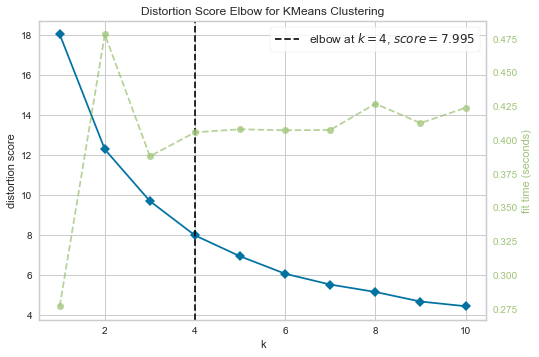

In [37]:
#features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
features_no_ott = df[['putt_raw','arg_raw','app_raw']].values
features_no_ott_scaled = data_scaler.fit_transform(features_no_ott)
features_no_ott_scaled = pd.DataFrame(features_no_ott_scaled, columns=['putt_raw','arg_raw','app_raw'])
sse = []

# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_ott_scaled)

#Create the graph
visualizer.show();

In [41]:
kmeansmodel_no_ott = KMeans(n_clusters= 4)
y_kmeans_no_ott= kmeansmodel_no_ott.fit_predict(features_no_ott_scaled)
kmeansmodel_no_ott.inertia_

7.994700974591545

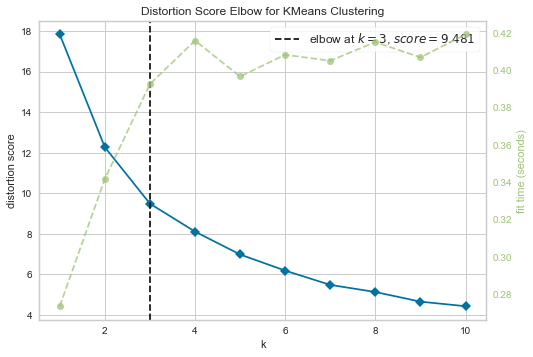

In [42]:
#features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
features_no_app = df[['putt_raw','arg_raw','ott_raw']].values
features_no_app_scaled = data_scaler.fit_transform(features_no_app)
features_no_app_scaled = pd.DataFrame(features_no_app_scaled, columns=['putt_raw','arg_raw','ott_raw'])
sse = []

# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_app_scaled)

#Create the graph
visualizer.show();

In [43]:
kmeansmodel_no_app = KMeans(n_clusters= 3)
y_kmeans_no_app= kmeansmodel_no_app.fit_predict(features_no_app_scaled)
kmeansmodel_no_app.inertia_

9.480834787169323

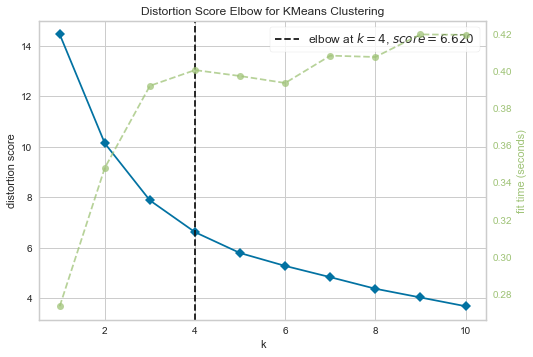

In [44]:
#features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
features_no_arg = df[['putt_raw','app_raw','ott_raw']].values
features_no_arg_scaled = data_scaler.fit_transform(features_no_arg)
features_no_arg_scaled = pd.DataFrame(features_no_arg_scaled, columns=['putt_raw','app_raw','ott_raw'])
sse = []

# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_arg_scaled)

#Create the graph
visualizer.show();

In [45]:
kmeansmodel_no_arg = KMeans(n_clusters= 4)
y_kmeans_no_arg= kmeansmodel_no_arg.fit_predict(features_no_arg_scaled)
kmeansmodel_no_arg.inertia_

6.619520349323648

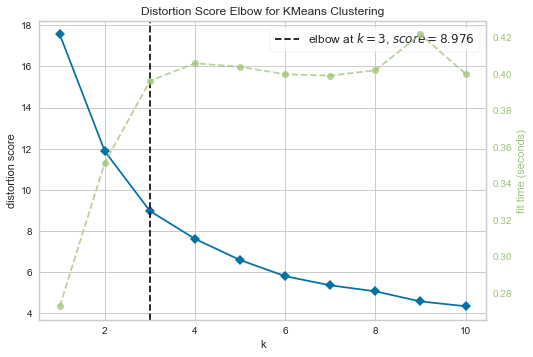

In [46]:
#features = df[['putt_raw','arg_raw','app_raw','ott_raw']].values
features_no_putt = df[['arg_raw','app_raw','ott_raw']].values
features_no_putt_scaled = data_scaler.fit_transform(features_no_putt)
features_no_putt_scaled = pd.DataFrame(features_no_putt_scaled, columns=['arg_raw','app_raw','ott_raw'])
sse = []

# Instantiate the clustering model and graph
model = KMeans()
visualizer = KElbowVisualizer(model, k=np.arange(1,11,1))

# Fit the data to the visualizer
visualizer.fit(features_no_putt_scaled)

#Create the graph
visualizer.show();

In [47]:
kmeansmodel_no_putt = KMeans(n_clusters= 3)
y_kmeans_no_putt= kmeansmodel_no_putt.fit_predict(features_no_putt_scaled)
kmeansmodel_no_putt.inertia_

8.976294596675682